In [1]:
import matplotlib
import pandas as pd
import numpy as np
import scipy.stats as si
import sympy as sy
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import norm
pd.options.display.max_columns = None
os.chdir('C:/Users/regru/Desktop/Springboard/Springboard_Project2')

In [2]:
#import dataset
df0 = pd.read_csv('telcom_churn.xls')

In [3]:
df0.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df = df0.drop(columns=['customerID','TotalCharges'])
df1 = df0.drop(columns=['customerID','TotalCharges'])

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [6]:
#encode categorical vars with label encoder
from sklearn.preprocessing import LabelEncoder
cat_features = df.columns[(df.columns != 'SeniorCitizen') & (df.columns != 'tenure') & (df.columns != 'MonthlyCharges') & (df.columns != 'TotalCharges')]
labelencoder = LabelEncoder()
for feature in cat_features:
    df[feature] = labelencoder.fit_transform(df[feature])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [7]:
#encode categorical with dummy vars
df_dummy = pd.get_dummies(df1[cat_features],columns=cat_features,drop_first=True)
df_col_numeric = ['SeniorCitizen','tenure','MonthlyCharges']
df_mod = pd.concat([df_dummy,df1[df_col_numeric]],axis=1)
df_mod.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,29.85
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,34,56.95
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,2,53.85
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,45,42.30
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,2,70.70


In [8]:
# Separate label and features
label = df.Churn
features = df.drop(columns=['Churn'])
# Separate label and features for dummy df
label1 = df_mod.Churn_Yes
features1 = df_mod.drop(columns=['Churn_Yes'])

In [9]:
# Split to training and test sets
from sklearn.model_selection import train_test_split
x, xt, ytrain, ytest = train_test_split(features.values,label.values,random_state=344)
# Split to training and test sets for dummy df
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(features1.values,label1.values,random_state=344)

C:\Users\regru\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


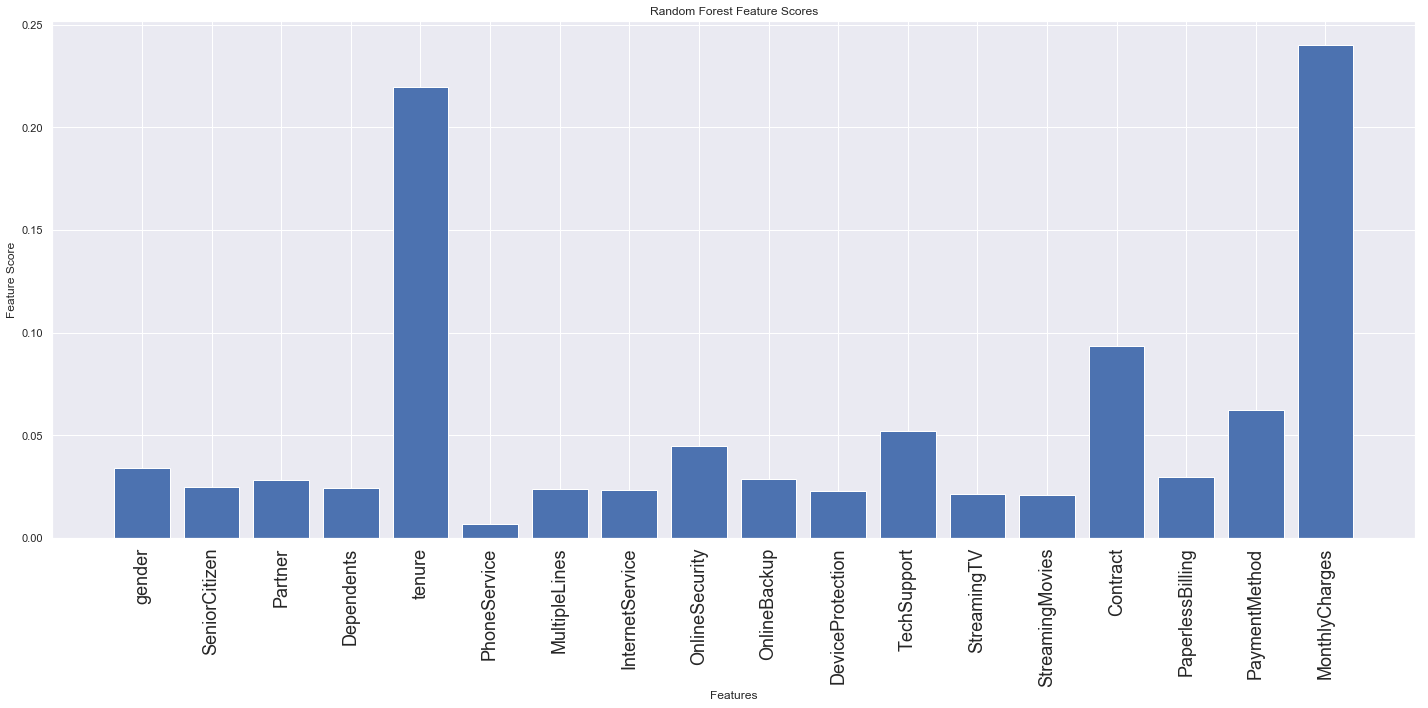

0.8023850085178875

In [10]:
# Fit model and view the most predictive features
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=684)
rf.fit(x,ytrain)
preds = rf.predict(xt)

#feature scores
feat_scores = rf.feature_importances_

# Plot the Random Forest scores
sns.set()
plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=18)
plt.bar(range(len(features.columns)), feat_scores)
plt.xticks(range(len(features.columns)), features, rotation='vertical')
plt.title('Random Forest Feature Scores')
plt.xlabel('Features')
plt.ylabel('Feature Score')
plt.tight_layout()
plt.savefig('Graphs/full_feature_scores.png')
plt.show()

# model accuracy
accuracy_score(ytest, preds)

In [11]:
# Tune model parameters
from sklearn.grid_search import GridSearchCV
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True, random_state=0) 

param_grid = { 
    'n_estimators': [150,200,250,300,350,400,500],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='roc_auc', cv= 5)
CV_rfc.fit(x, ytrain)
CV_rfc.best_params_

C:\Users\regru\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\regru\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'n_estimators': 150}

In [12]:
#fit model to label encoded df
rf = RandomForestClassifier(n_jobs=-1,max_features= 'auto', max_depth=10, min_samples_leaf=4, oob_score = True, n_estimators=250, random_state=0)
rf.fit(x,ytrain)
rf_preds = rf.predict(xt)
#fit model to dummy df
rf1 = RandomForestClassifier(n_jobs=-1,max_features= 'auto', max_depth=10, min_samples_leaf=4, oob_score = True, n_estimators=250, random_state=0)
rf1.fit(xtrain1,ytrain1)
rf_preds1 = rf1.predict(xtest1)

# model accuracy
print([accuracy_score(ytest, rf_preds),accuracy_score(ytest1, rf_preds1)])

[0.8103350369108461, 0.8097671777399205]


In [13]:
# confusion matrix for randomforest
pd.crosstab(ytest, rf_preds, rownames=['Actual'], colnames=['Predicted'], margins=True,normalize='all')

Predicted,0,1,All
Actual,,,
0,0.687110,0.067007,0.754117
1,0.122658,0.123225,0.245883
All,0.809767,0.190233,1.000000


In [14]:
# confusion matrix for randomforest (counts)
pd.crosstab(ytest, rf_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1210,118,1328
1,216,217,433
All,1426,335,1761


In [15]:
# 5-fold cross validation using mean and stdev AUC value of ROC
def np_kfold_roc(clf, x, y,nfold=5):
    result = 0
    result_sq = 0
    for train, validation in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += roc_auc_score(y[validation], clf.predict_proba(x[validation])[:,1])# evaluate score function on held-out data
    avg_auroc = result/nfold 
    for train_1, validation_1 in KFold(nfold).split(x):
        clf.fit(x[train_1], y[train_1])
        result_sq += (roc_auc_score(y[validation_1], clf.predict_proba(x[validation_1])[:,1]) - avg_auroc)**2
    std_auroc = result_sq/nfold
    return (avg_auroc,np.sqrt(std_auroc))
np_kfold_roc(rf,x,ytrain)

(0.8368119525524074, 0.019479539278071945)

C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


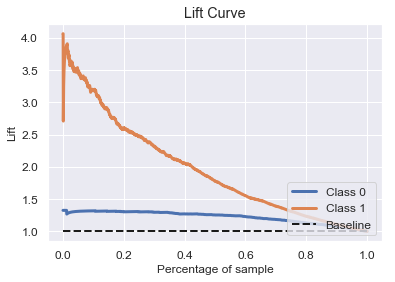

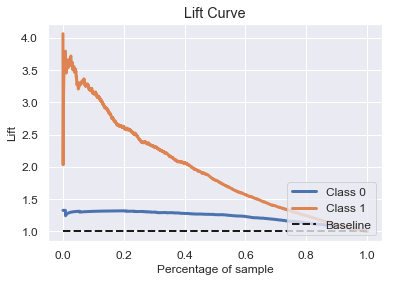

In [16]:
# Lift Graph
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_true=ytest, y_probas=rf.predict_proba(xt))
skplt.metrics.plot_lift_curve(y_true=ytest1, y_probas=rf1.predict_proba(xtest1))
sns.set()
#plt.title('RF Lift Curve Comparison')
#plt.savefig('Graphs/rf_lift_curve.png')
plt.show()

In [17]:
#xgboost on label encoded df
from xgboost import XGBClassifier
# fit model to label encoded df
xg_mod = XGBClassifier()
xg_mod.fit(x, ytrain)
# make predictions for test data
xg_preds = xg_mod.predict(xt)
# fit model to dummy df
xg_mod1 = XGBClassifier()
xg_mod1.fit(xtrain1, ytrain1)
# make predictions for test data
xg_preds1 = xg_mod1.predict(xtest1)
# evaluate predictions
print([accuracy_score(ytest, xg_preds),accuracy_score(ytest1, xg_preds1)])

C:\Users\regru\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0.8131743327654741, 0.8165814877910278]


C:\Users\regru\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [18]:
# confusion matrix
pd.crosstab(ytest, xg_preds, rownames=['Actual'], colnames=['Predicted'], margins=True, normalize='all')

Predicted,0,1,All
Actual,,,
0,0.685974,0.068143,0.754117
1,0.118683,0.127200,0.245883
All,0.804656,0.195344,1.000000


In [19]:
# confusion matrix
pd.crosstab(ytest, xg_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1208,120,1328
1,209,224,433
All,1417,344,1761


In [20]:
# 5-fold cross validation and AUC value of ROC
np_kfold_roc(xg_mod,x,ytrain)

(0.8388781324777513, 0.01759548148152592)

C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


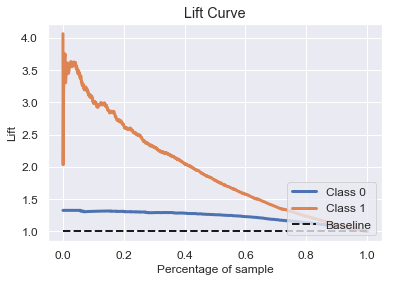

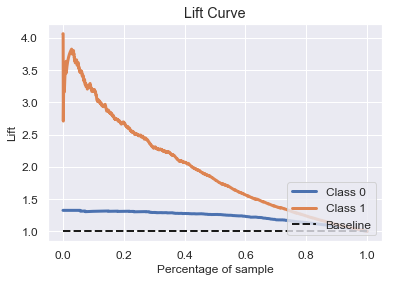

In [21]:
# Lift Graph
skplt.metrics.plot_lift_curve(y_true=ytest, y_probas=xg_mod.predict_proba(xt))
skplt.metrics.plot_lift_curve(y_true=ytest1, y_probas=xg_mod1.predict_proba(xtest1))
sns.set()
#plt.title('XGBoost Lift Curve')
#plt.savefig('Graphs/xgb_lift_curve.png')
plt.show()

In [22]:
#catboost
from catboost import CatBoostClassifier
#fit model to label encoded df
catb_mod = CatBoostClassifier(silent=True)
#train the model
catb_mod.fit(x,ytrain)
# make the prediction using the resulting model
catb_preds = catb_mod.predict(xt)
#fit model to dummy df
catb_mod1 = CatBoostClassifier(silent=True)
#train the model
catb_mod1.fit(xtrain1,ytrain1)
# make the prediction using the resulting model
catb_preds1 = catb_mod1.predict(xtest1)
#accuracy
print([accuracy_score(ytest, catb_preds),accuracy_score(ytest1, catb_preds1)])

[0.814877910278251, 0.8165814877910278]


In [23]:
# confusion matrix
pd.crosstab(ytest, catb_preds, rownames=['Actual'], colnames=['Predicted'], margins=True, normalize='all')

Predicted,0.0,1.0,All
Actual,,,
0,0.688245,0.065872,0.754117
1,0.119250,0.126633,0.245883
All,0.807496,0.192504,1.000000


In [24]:
# confusion matrix
pd.crosstab(ytest, catb_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
Actual,,,
0,1212,116,1328
1,210,223,433
All,1422,339,1761


In [25]:
# 5-fold cross validation using mean and stdev AUC value of ROC
np_kfold_roc(catb_mod,x,ytrain) 

(0.8408267013468897, 0.01921516086118772)

C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


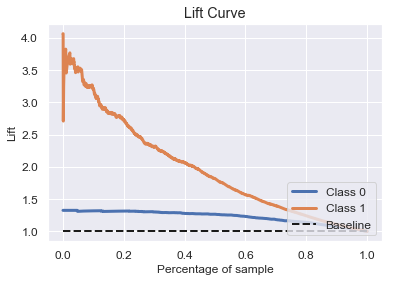

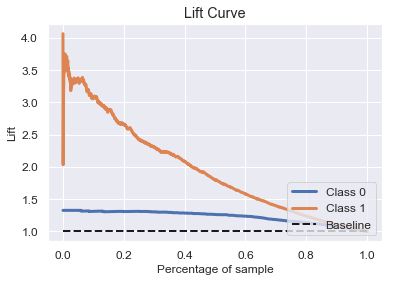

In [26]:
# Lift Graph
skplt.metrics.plot_lift_curve(y_true=ytest, y_probas=catb_mod.predict_proba(xt))
skplt.metrics.plot_lift_curve(y_true=ytest1, y_probas=catb_mod1.predict_proba(xtest1))
sns.set()
#plt.title('CatBoost Lift Curve')
#plt.savefig('Graphs/catb_lift_curve.png')
plt.show()

In [27]:
#logistic regression
from sklearn.linear_model import LogisticRegression
# fit model to label encoded df
logreg = LogisticRegression()
logreg.fit(x,ytrain)
#make predictions on test data
logreg_preds = logreg.predict(xt)
# fit model to dummy df
logreg1 = LogisticRegression()
logreg1.fit(xtrain1,ytrain1)
#make predictions on test data
logreg_preds1 = logreg1.predict(xtest1)
#accuracy
print([accuracy_score(ytest, logreg_preds),accuracy_score(ytest1, logreg_preds1)])

[0.8114707552526973, 0.8091993185689949]


In [28]:
# confusion matrix
pd.crosstab(ytest, logreg_preds, rownames=['Actual'], colnames=['Predicted'], margins=True, normalize='all')

Predicted,0,1,All
Actual,,,
0,0.679160,0.074957,0.754117
1,0.113572,0.132311,0.245883
All,0.792731,0.207269,1.000000


In [29]:
# confusion matrix
pd.crosstab(ytest, logreg_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1196,132,1328
1,200,233,433
All,1396,365,1761


In [30]:
# 5-fold cross validation using mean and stdev AUC value of ROC
np_kfold_roc(logreg,x,ytrain)

(0.8395414041132643, 0.01935433258402368)

C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


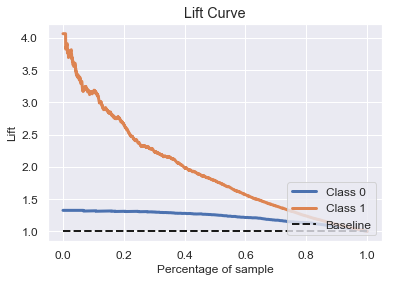

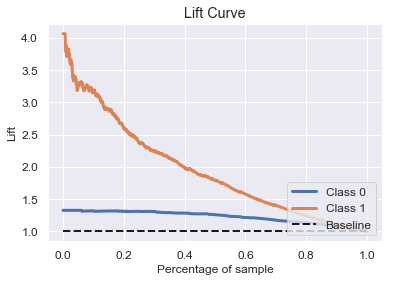

In [31]:
# Lift Graph
skplt.metrics.plot_lift_curve(y_true=ytest, y_probas=logreg.predict_proba(xt))
skplt.metrics.plot_lift_curve(y_true=ytest1, y_probas=logreg1.predict_proba(xtest1))
sns.set()
#plt.title('Logistic Regression Lift Curve')
#plt.savefig('Graphs/logreg_lift_curve.png')
plt.show()

In [32]:
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
clf1 = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt', oob_score = True, n_estimators=350, random_state=0)
clf2 = CatBoostClassifier(silent=True)
clf3 = XGBClassifier()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

sclf.fit(x,ytrain)
stacked_preds = sclf.predict(xt)
#accuracy
accuracy_score(ytest, stacked_preds)

0.7961385576377058

In [33]:
# confusion matrix
pd.crosstab(ytest, stacked_preds, rownames=['Actual'], colnames=['Predicted'], margins=True, normalize='all')

Predicted,0,1,All
Actual,,,
0,0.676888,0.077229,0.754117
1,0.126633,0.119250,0.245883
All,0.803521,0.196479,1.000000


In [34]:
# confusion matrix
pd.crosstab(ytest, stacked_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1192,136,1328
1,223,210,433
All,1415,346,1761


In [35]:
# 5-fold cross validation using mean and stdev AUC value of ROC
np_kfold_roc(sclf,x,ytrain)

(0.8078684996911857, 0.014956836565608107)

C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


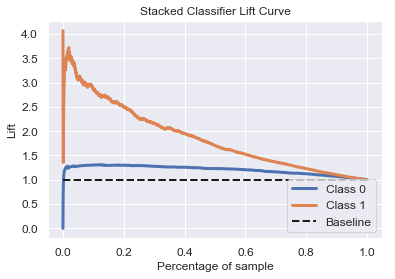

In [36]:
# Lift Graph
skplt.metrics.plot_lift_curve(y_true=ytest, y_probas=sclf.predict_proba(xt))
sns.set()
plt.title('Stacked Classifier Lift Curve')
plt.savefig('Graphs/sclf_lift_curve.png')
plt.show()

In [37]:
from sklearn.neural_network import MLPClassifier
#fit model to label encoded df
mlp = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(2,), random_state=1)
mlp.fit(x, ytrain)
mlnn_preds = mlp.predict(xt)
#fit model to dummy df
mlp1 = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(2,), random_state=1)
mlp1.fit(xtrain1, ytrain1)
mlnn_preds1 = mlp1.predict(xtest1)
#accuracy
print([accuracy_score(ytest, mlnn_preds),accuracy_score(ytest1, mlnn_preds1)])

[0.7541169789892107, 0.8137421919363997]


In [38]:
# confusion matrix
pd.crosstab(ytest, mlnn_preds, rownames=['Actual'], colnames=['Predicted'], margins=True, normalize='all')

Predicted,0,All
Actual,,
0,0.754117,0.754117
1,0.245883,0.245883
All,1.000000,1.000000


In [39]:
# confusion matrix
pd.crosstab(ytest, mlnn_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,All
Actual,,
0,1328,1328
1,433,433
All,1761,1761


In [40]:
# 5-fold cross validation using mean and stdev AUC value of ROC
np_kfold_roc(mlp,x,ytrain)

(0.7116946563389973, 0.16274570642963562)

C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


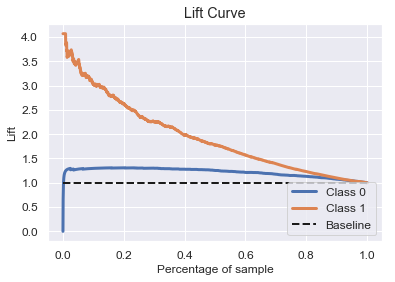

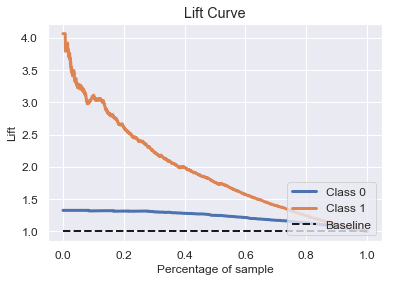

In [41]:
# Lift Graph
skplt.metrics.plot_lift_curve(y_true=ytest, y_probas=mlp.predict_proba(xt))
skplt.metrics.plot_lift_curve(y_true=ytest1, y_probas=mlp1.predict_proba(xtest1))
sns.set()
#plt.title('Multi-level Perceptron Lift Curve')
#plt.savefig('Graphs/mlp_lift_curve.png')
plt.show()

In [42]:
# Calculate ROC curve for each model
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(ytest, rf.predict_proba(xt)[:,1])
fpr2, tpr2, threshold2 = roc_curve(ytest, xg_mod.predict_proba(xt)[:,1])
fpr3, tpr3, threshold3 = roc_curve(ytest, catb_mod.predict_proba(xt)[:,1])
fpr4, tpr4, threshold4 = roc_curve(ytest, logreg.predict_proba(xt)[:,1])
fpr5, tpr5, threshold5 = roc_curve(ytest, mlp.predict_proba(xt)[:,1])
fpr6, tpr6, threshold6 = roc_curve(ytest, sclf.predict_proba(xt)[:,1])
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
roc_auc5 = auc(fpr5, tpr5)
roc_auc6 = auc(fpr6, tpr6)

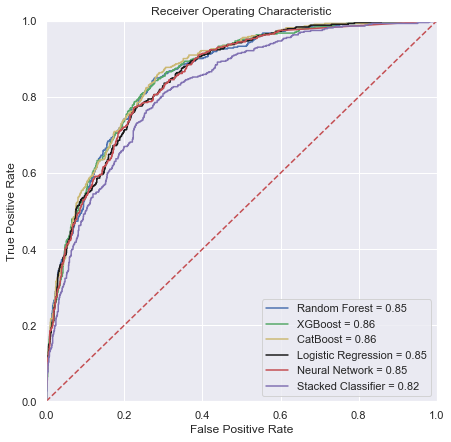

In [43]:
# Plot ROC curves
sns.set()
plt.rcParams["figure.figsize"] = (7,7)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'Random Forest = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'XGBoost = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'y', label = 'CatBoost = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, 'k', label = 'Logistic Regression = %0.2f' % roc_auc4)
plt.plot(fpr5, tpr5, 'r', label = 'Neural Network = %0.2f' % roc_auc5)
plt.plot(fpr6, tpr6, 'm', label = 'Stacked Classifier = %0.2f' % roc_auc6)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('Graphs/ROC Curves.png')
plt.show()